<a href="https://colab.research.google.com/github/sharinair14/ML-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('/content/churn.csv')

In [6]:
data.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


**Checking features data types**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Checking Missing Values**

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.shape

(7043, 21)

In [12]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Visualizing the data**

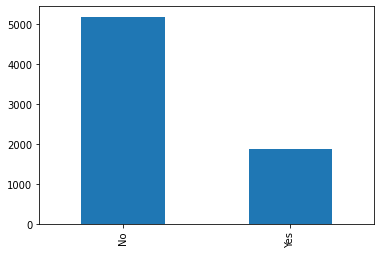

In [14]:
data['Churn'].value_counts().plot(kind='bar')

In [18]:
total_no=data['Churn'].value_counts()[0]
total_yes=data['Churn'].value_counts()[1]

#Percentage of churn 
print('Percentage of people churned',total_yes/(total_yes+total_no)*100)
print('Percentage of people not churned',total_no/(total_yes+total_no)*100)

Percentage of people churned 26.536987079369588
Percentage of people not churned 73.4630129206304


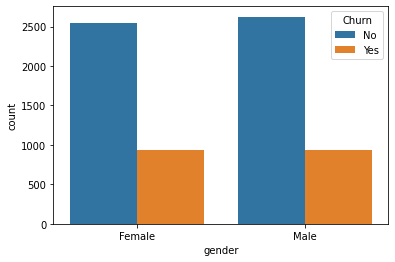

In [27]:
sns.countplot(data=data,x='gender',hue='Churn')

From the above plot,it is inferenced that most percentage of churn rate are male.

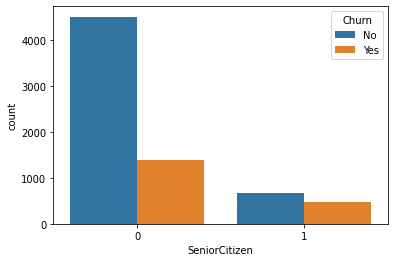

In [28]:
sns.countplot(data=data,x='SeniorCitizen',hue='Churn')

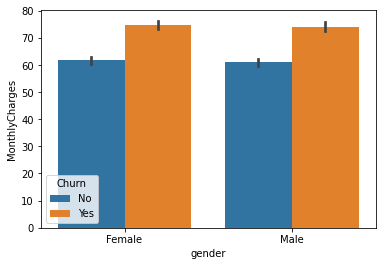

In [36]:
sns.barplot(x='gender',y='MonthlyCharges',hue='Churn',data=data)

From the above visualization, it is clear that male or female who churned have higher monthly charges.

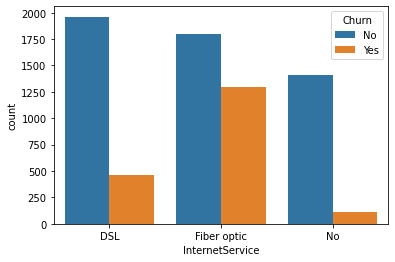

In [38]:
sns.countplot(data=data,x='InternetService',hue='Churn')

The people who have high churn rate mostly used Fiber optic internet service.

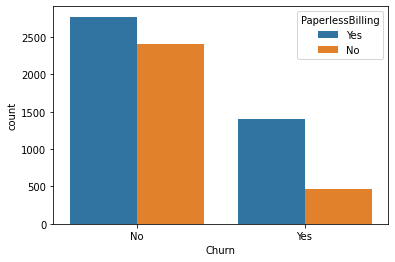

In [41]:
sns.countplot(data=data,x='Churn',hue='PaperlessBilling')

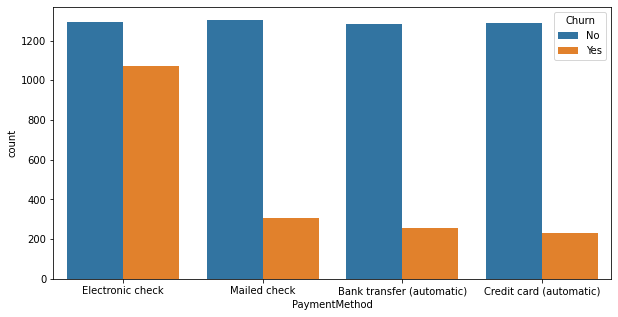

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='PaymentMethod',hue='Churn')

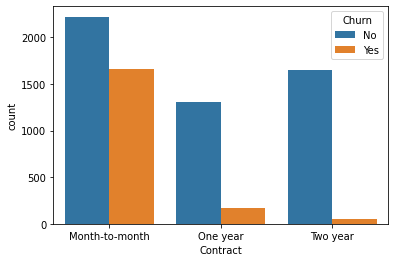

In [44]:
sns.countplot(data=data,x='Contract',hue='Churn')

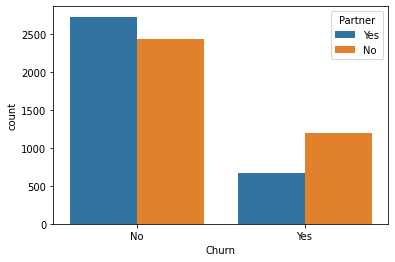

In [46]:
sns.countplot(data=data,x='Churn',hue='Partner')

From the above plot , it is inferred that the people who move away from particular brand either single or do not live with their partner.

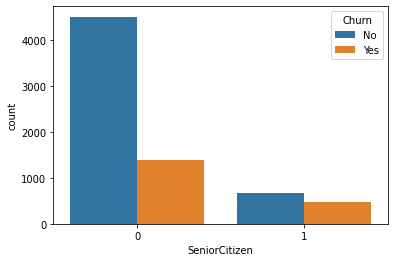

In [48]:
sns.countplot(data=data,x='SeniorCitizen',hue='Churn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1f6a447b8>,
      dtype=object)

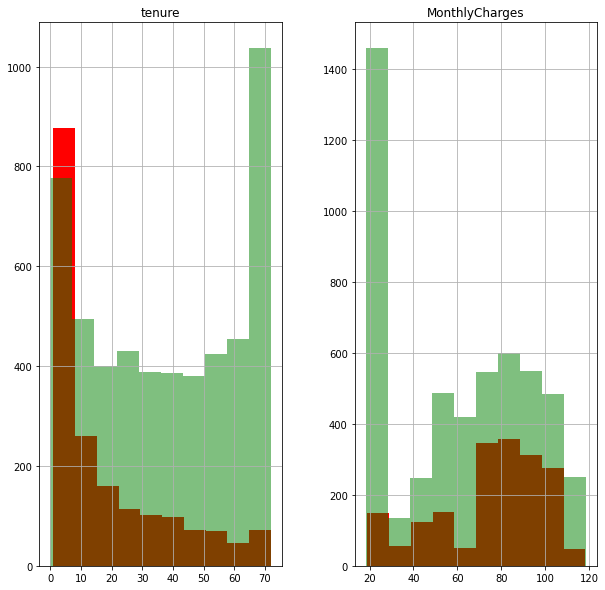

In [62]:
numvar=['tenure','MonthlyCharges']
fig,ax=plt.subplots(1,2,figsize=(10,10))
data[data['Churn']=='Yes'][numvar].hist(bins=10,ax=ax,color='red')
data[data['Churn']=='No'][numvar].hist(bins=10,ax=ax,color='green',alpha=0.5)

**Removing the unwanted column**

In [64]:
new_data=data.drop('customerID',axis=1)

**Converting categorical column to numeric column**

In [67]:
#changing all categorical columns to numerical columns
for column in new_data.columns:
  if new_data[column].dtype == np.number:
    continue
  
  from sklearn.preprocessing import LabelEncoder
  new_data[column]=LabelEncoder().fit_transform(new_data[column])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [69]:
new_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [71]:
x=new_data.drop('Churn',axis=1)
y=new_data['Churn']

**Splitting into train and test set**

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=102)

In [74]:
x_train.shape,x_test.shape

((4930, 19), (2113, 19))

**Scaling the data**

In [82]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101)
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)

In [84]:
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix,precision_score
print('Accuracy of training set',lr.score(x_train,y_train))
print('Accuracy of testing set',accuracy_score(y_test,ypred))
print('Recall score ',recall_score(y_test,ypred))
print('Precision score ',precision_score(y_test,ypred))
print('Confusion Matrix',confusion_matrix(y_test,ypred))

Accuracy of training set 0.803448275862069
Accuracy of testing set 0.8054898248935163
Recall score  0.546448087431694
Precision score  0.6493506493506493
Confusion Matrix [[1402  162]
 [ 249  300]]


**SVM**

In [122]:
from sklearn.svm import SVC
sv=SVC(random_state=102)

In [123]:
sv.fit(x_train,y_train)
ypred_svm=sv.predict(x_test)

In [124]:
print('Accuracy of training set',sv.score(x_train,y_train))
print('Accuracy of testing set',accuracy_score(y_test,ypred_svm))
print('Recall score ',recall_score(y_test,ypred_svm))
print('Precision score ',precision_score(y_test,ypred_svm))
print('Confusion Matrix',confusion_matrix(y_test,ypred_svm))

Accuracy of training set 0.8223123732251522
Accuracy of testing set 0.8021769995267393
Recall score  0.4772313296903461
Precision score  0.6666666666666666
Confusion Matrix [[1433  131]
 [ 287  262]]


**Random Forest**

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=102)
rf.fit(x_train,y_train)
ypred_rf=rf.predict(x_test)

In [101]:
print('Accuracy of training set',rf.score(x_train,y_train))
print('Accuracy of testing set',accuracy_score(y_test,ypred_rf))
print('Recall score ',recall_score(y_test,ypred_rf))
print('Precision score ',precision_score(y_test,ypred_rf))
print('Confusion Matrix',confusion_matrix(y_test,ypred_rf))

Accuracy of training set 0.9979716024340771
Accuracy of testing set 0.8021769995267393
Recall score  0.5300546448087432
Precision score  0.6452328159645233
Confusion Matrix [[1404  160]
 [ 258  291]]


From above all the, Random Forest works well for this dataset.